In [1]:
# allows the code to be reload automatically, without restarting the whole kernel

%load_ext autoreload
%autoreload 1
%aimport Graph
%aimport BipartiteGraph
%aimport UnipartiteGraph
%aimport TripartiteGraph

from Graph import Graph # import our file 
from BipartiteGraph import BipartiteGraph # import our file 
from UnipartiteGraph import UnipartiteGraph # import our file 
from TripartiteGraph import TripartiteGraph # import our file 

import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import random 
from guppy import hpy
import sys

from collections import defaultdict
from random import shuffle
from itertools import chain
import time
import random
from collections import Counter
from itertools import chain
import itertools
import queue
from copy import deepcopy

import matplotlib.pyplot as plt
import pickle
import seaborn as sns ; sns.set(style="ticks", color_codes=True)

import sys
sys.setrecursionlimit(15000)

# Data

In [2]:
# LOAD DATASETS

bpse   = BipartiteGraph.from_file("data/examples/bpse_path.BIP.ORIGIN",separator=" ")
# linux  = BipartiteGraph.from_file("data/bipartite/lkml_person-thread/out.lkml_person-thread_person-thread",separator=" ",start = 2)
# actors = BipartiteGraph.from_file("/home/cecile/Documents/LIP6/github/data/bipartite/actor-movie/out.actor-movie",separator=" ",start = 1)
hepB   = BipartiteGraph.from_file("data/examples/hepB.BIP.ORIGIN",separator=" ")

# github = BipartiteGraph.from_file("/home/cecile/Documents/LIP6/github/data/bipartite/github/out.github",separator=" ",start = 2)
arxiv = BipartiteGraph.from_file("/home/cecile/Documents/LIP6/github/data/bipartite/opsahl-collaboration/out.opsahl-collaboration",separator=" ",start = 2)

norway   = BipartiteGraph.from_file("data/bipartite/net2m_2011-08-01.txt",separator=" ")
newman   = BipartiteGraph.from_file("data/bipartite/Newman-Cond_mat_95-99-two_mode.txt",separator=" ")

woman = BipartiteGraph.from_file("data/bipartite/Davis_southern_club_women-two_mode.txt",separator=" ")


In [3]:
# LOAD MAX BICLIQUES
file = open('generated/bicliques_all/bpse.mb', 'rb')
bpse_mb = pickle.load(file)
file.close()

file = open('generated/bicliques_all/hepB.mb', 'rb')
hepB_mb = pickle.load(file)
file.close()

file = open('generated/bicliques_all/arxiv.mb', 'rb')
arxiv_mb = pickle.load(file)
file.close()

file = open('generated/bicliques_all/norwegian.mb', 'rb')
norway_mb = pickle.load(file)
file.close()

file = open('generated/bicliques_all/newman.mb', 'rb')
newman_mb = pickle.load(file)
file.close()

file = open('generated/bicliques_all/woman.mb', 'rb')
woman_mb = pickle.load(file)
file.close()

--- 0.37349390983581543 seconds ---


,value
nb_vertices,522
nb_edges,7089
density,0.0151062
nb_connected_components,37
degree_avg,13.5805
degree_sum,7089
degree_min,1
degree_max,126


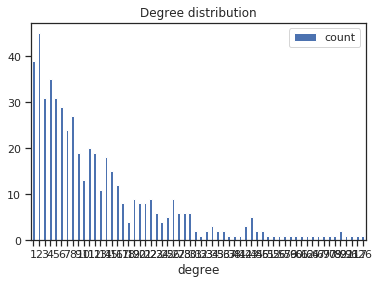

In [4]:
test   = BipartiteGraph.from_file("data/bipartite/OF_two-mode_weightedmsg.txt",separator=" ")
test.analyze(test.bottom)

--- 16.065895080566406 seconds ---


,value
nb_vertices,22015
nb_edges,58595
density,0.000159129
nb_connected_components,1312
degree_avg,2.66159
degree_sum,58595
degree_min,1
degree_max,18


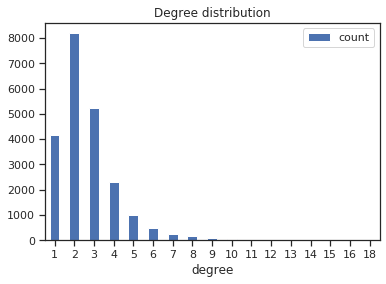

In [7]:
newman.analyze(newman.bottom)

--- 0.11256194114685059 seconds ---


,value
nb_vertices,1421
nb_edges,1746
density,0.00346116
nb_connected_components,111
degree_avg,1.22871
degree_sum,1746
degree_min,1
degree_max,8


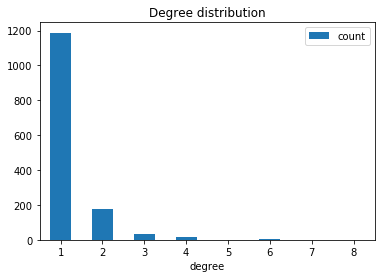

In [10]:
net.analyze(net.bottom)

--- 18.317618131637573 seconds ---


,value
nb_vertices,16726
nb_edges,58595
density,0.000159129
nb_connected_components,1312
degree_avg,3.50323
degree_sum,58595
degree_min,1
degree_max,116


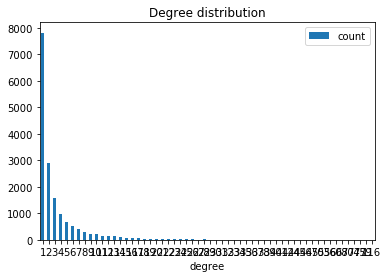

In [30]:


newman.analyze(newman.top)

In [3]:
file = open('generated/bicliques_all/bpse.bm', 'rb')
bb = pickle.load(file)
bb

{(frozenset({1356, 1357}), frozenset({257, 258, 260})),
 (frozenset({150,
             178,
             179,
             180,
             181,
             182,
             183,
             184,
             185,
             186,
             187,
             188,
             189,
             190}),
  frozenset({9, 10})),
 (frozenset({685,
             783,
             784,
             785,
             786,
             787,
             788,
             789,
             790,
             791,
             792,
             838,
             839,
             840,
             841,
             842,
             1371,
             1423,
             1424,
             1425,
             1426,
             1427,
             1428}),
  frozenset({278, 280})),
 (frozenset({716, 717}), frozenset({120, 257, 264, 276})),
 (frozenset({1144, 1145, 1146, 1147}), frozenset({214, 215, 216})),
 (frozenset({112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124}),
  frozenset

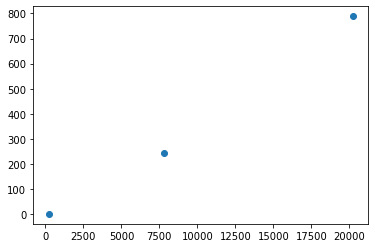

In [17]:
x = [202,20235,7811]
y = [0.81,789,242]

plt.scatter(x,y)

# Compare degree distribution

In [4]:
def compare_degree_dist(graph,strategy,max_bicliques = None ,setnames=["top","bottom"]):
    
    # get graphs
    graph_rd = BipartiteGraph.configuration_model(graph = graph)
    graph_tri,_ = graph.tripartite_model(strategy=strategy, max_bicliques = max_bicliques)
#     graph_tri = 
    
    
    def compare_by_set(setname):
        
        # ----------
        # variable
        degrees_all = graph.get_all_degrees(graph.__dict__.get(setname))
        distribution = Counter(degrees_all.values()) # return a dict (degree:count)

        degrees_all_rd = graph_rd.get_all_degrees(graph_rd.__dict__.get(setname))
        distribution_rd = Counter(degrees_all_rd.values()) # return a dict (degree:count)

        degrees_all_tri = graph_tri.get_all_degrees(graph_tri.__dict__.get(setname))
        distribution_tri = Counter(degrees_all_tri.values()) # return a dict (degree:count)

        #-----------
        #plotting
        df_distribution = pd.DataFrame.from_dict(distribution, orient='index').reset_index()
        df_distribution.rename(columns={'index':'degree',0:'count'}, inplace=True)
        df_distribution.sort_values(by="degree",ascending=1, inplace=True) # sort the degree by ascending order

        df_distribution_rd = pd.DataFrame.from_dict(distribution_rd, orient='index').reset_index()
        df_distribution_rd.rename(columns={'index':'degree',0:'count_rd'}, inplace=True)
        df_distribution_rd.sort_values(by="degree",ascending=1, inplace=True) # sort the degree by ascending order

        df_distribution_tri = pd.DataFrame.from_dict(distribution_tri, orient='index').reset_index()
        df_distribution_tri.rename(columns={'index':'degree',0:'count_tri'},inplace=True)
        df_distribution_tri.sort_values(by="degree",ascending=1, inplace=True) # sort the degree by ascending order



        ax = df_distribution.plot(color = "yellow",x="degree", y="count", title="Degree distribution "+setname+" ("+strategy.upper()+")", rot=0,logx=True, logy=True)
        df_distribution_rd.plot(color = "green",ax=ax, x="degree", y="count_rd")
        df_distribution_tri.plot(color = "red",ax=ax, x="degree", y="count_tri")

    for setname in setnames:
        compare_by_set(setname)

    # plt.locator_params(axis='ax', nbins=6)
    # ylim=(0,100)
    #ylim=(0,100),xlim=(0,10000)


3051 / 3071
541 / 542
273 / 275
1563 / 1568
3049 / 3071
627 / 627
265 / 265
1424 / 1429
3050 / 3071
569 / 571
274 / 274
1485 / 1488
3044 / 3071
591 / 591
288 / 288
1368 / 1375


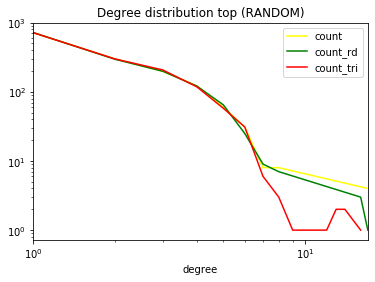

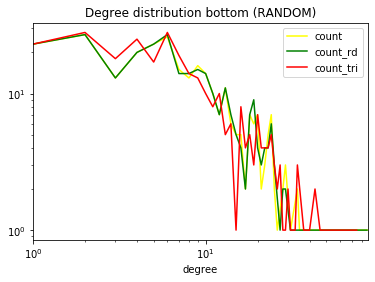

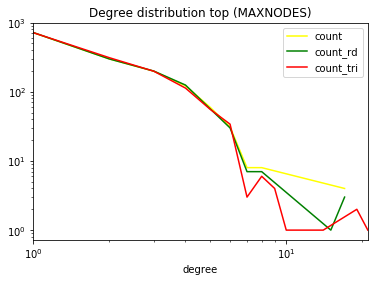

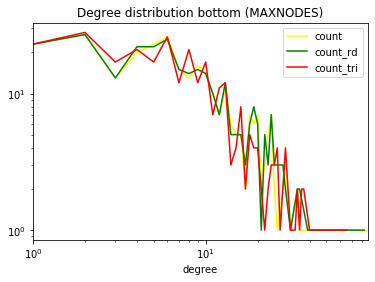

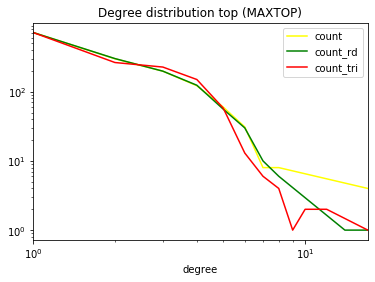

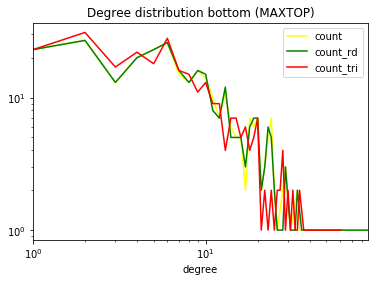

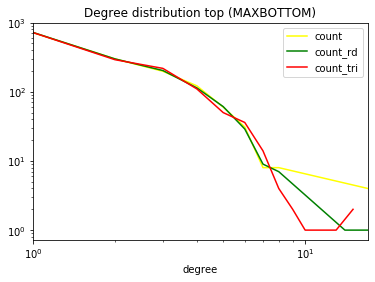

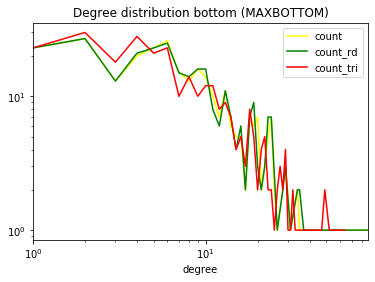

In [46]:
compare_degree_dist(bpse,"random",max_bicliques = bpse_mb)
compare_degree_dist(bpse,"maxnodes",max_bicliques = bpse_mb)
compare_degree_dist(bpse,"maxtop",max_bicliques = bpse_mb)
compare_degree_dist(bpse,"maxbottom",max_bicliques = bpse_mb)


In [14]:
##### file = open('generated/bicliques_all/hepB.bm', 'rb')
maxbicliques = pickle.load(file)
maxbicliques
compare_degree_dist(hepB, "maxnodes",max_bicliques = maxbicliques)

ValueError: peek of closed file

# Create dataframe with local data

In [7]:
graph = norway
graph_cm = graph.configuration_model(graph = graph)

1744 / 1746


In [8]:
graph_tri, bicliques_selected = graph.tripartite_model(strategy = "random", max_bicliques = norway_mb) # CHANGE MAX BICLIQUE

OK
59 / 59
71 / 71
1597 / 1598


In [9]:
def get_local_feature(feature_function, set1, copy = False):
    """
    Returns a dictionary with vertices id as keys, and degrees as values.

    """
    if copy:
        set1_to_iterate = deepcopy(set1)
    else:
        set1_to_iterate = set1

    a = dict()
    for key,value in set1_to_iterate.items():
        a[key] = feature_function(key,set1)

        

    print("LEN A",len(a.keys()))
    print("LEN SET",len(set1.keys()))
    return a

In [10]:
# Compute redundancy for a set of the graph
# For redundancy, because we delete a key and then re-add it, we must iterate over a COPY !

graph_cm_deepcopy = deepcopy(graph_cm)
count = 0
for key,value in graph_cm_deepcopy.top.items():
    graph_cm.get_redundancy(key,graph_cm.top)
    count = count+1
#     print(count)

print("COUNT",count)

COUNT 355


In [11]:
def all_local_features(graph, set1):
    all_degrees_set1 = graph.get_all_degrees(set1)
    cc_bullet_set1   = get_local_feature(graph.cc_bullet, set1)
    redundancy_set1  = get_local_feature(graph.get_redundancy, set1,True)

    # df = pd.DataFrame.from_dict(all_degrees, orient='index')

    graph_features_set1 = defaultdict(list)    

#     for k in set1:
#         graph_features_set1[k].extend([all_degrees_set1.get(k), cc_bullet_set1.get(k),redundancy_set1.get(k)[0]])
    
    print("SAME KEYS ?",all_degrees_set1.keys() == set1.keys())
    print("SAME KEYS ?",cc_bullet_set1.keys() == set1.keys())
    print("SAME KEYS ?",redundancy_set1.keys() == set1.keys())
    for k in set1:
        graph_features_set1[k].append(all_degrees_set1[k])
        graph_features_set1[k].append(cc_bullet_set1[k])
#         print("VALUE", redundancy_set1[k] )#redundancy_set1.get(k))
        test = redundancy_set1[k]
#         print("LEN ", len(redundancy_set1[k]))
#         print("value selected", redundancy_set1[k][0])

        graph_features_set1[k].append(redundancy_set1[k][0])

    
#     print("OK")

    df = pd.DataFrame.from_dict(graph_features_set1, orient='index',columns = ["degree","cc_bullet","redundancy"])
#     df = pd.DataFrame.from_dict(graph_features_set1, orient='index',columns = ["redundancy"])

    return df

In [12]:
df_features = all_local_features(graph, graph.top)

LEN A 355
LEN SET 355
LEN A 355
LEN SET 355
SAME KEYS ? True
SAME KEYS ? True
SAME KEYS ? True


In [13]:
df_features_cm = all_local_features(graph_cm , graph_cm.top)


LEN A 355
LEN SET 355
LEN A 355
LEN SET 355
SAME KEYS ? True
SAME KEYS ? True
SAME KEYS ? True


In [14]:
df_features_tri = all_local_features(graph_tri, graph_tri.top)

LEN A 355
LEN SET 355
LEN A 355
LEN SET 355
SAME KEYS ? True
SAME KEYS ? True
SAME KEYS ? True


/home/cecile/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning:

invalid value encountered in greater_equal

/home/cecile/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning:

invalid value encountered in less_equal



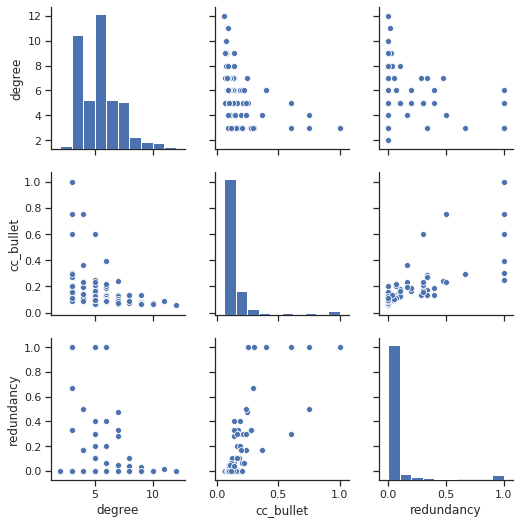

In [15]:
g = sns.pairplot(df_features, palette="husl")


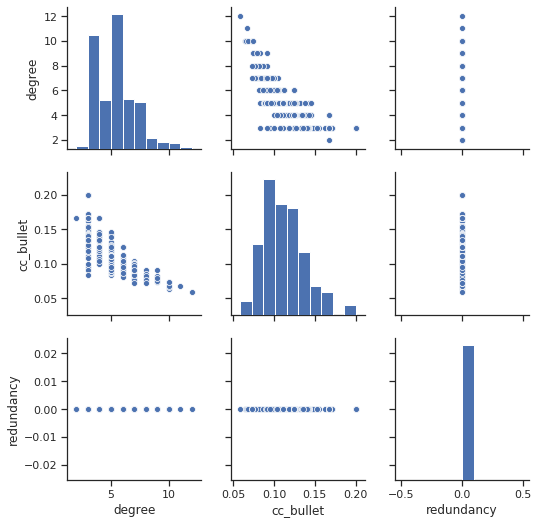

In [16]:
g = sns.pairplot(df_features_cm, palette="husl")


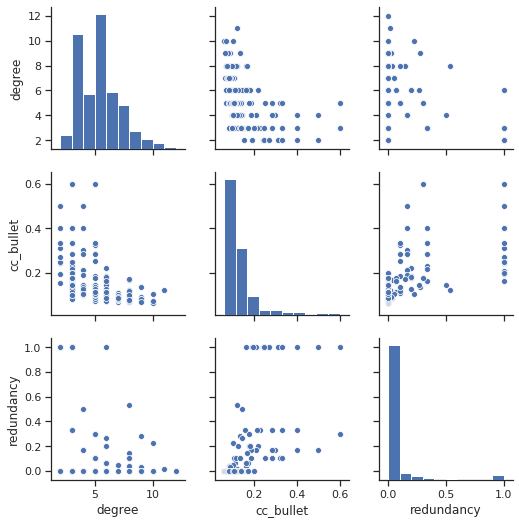

In [17]:
g = sns.pairplot(df_features_tri, palette="husl")


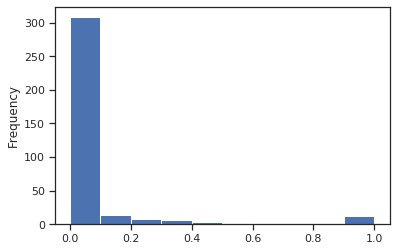

In [18]:
df_features["redundancy"].plot.hist()

In [19]:
len(df_features.loc[df_features["redundancy"] == 1])

13

In [20]:
len(df_features_cm.loc[df_features_cm["redundancy"] == 1])

0

In [216]:
len(df_features_tri[df_features_tri["redundancy"] == 1])

1197

--- 0.29611921310424805 seconds ---


,value
nb_vertices,355
nb_edges,1746
density,0.00346116
nb_connected_components,111
degree_avg,4.91831
degree_sum,1746
degree_min,2
degree_max,12


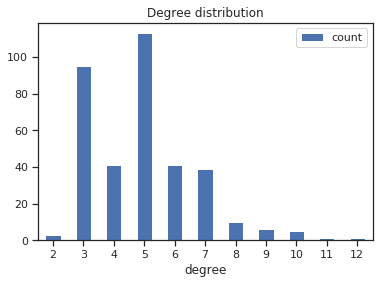

In [21]:
graph.analyze(graph.top)

--- 0.0784912109375 seconds ---


,value
nb_vertices,355
nb_edges,1744
density,0.0034572
nb_connected_components,75
degree_avg,4.91268
degree_sum,1744
degree_min,2
degree_max,12


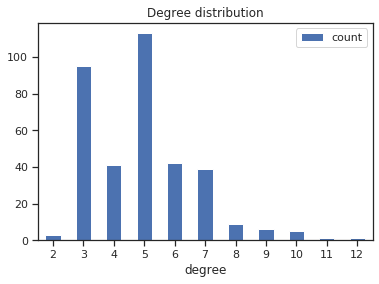

In [22]:
graph_cm.analyze(graph_cm.top)

--- 0.07514643669128418 seconds ---


,value
nb_vertices,355
nb_edges,1745
density,0.00345918
nb_connected_components,99
degree_avg,4.91549
degree_sum,1745
degree_min,2
degree_max,12


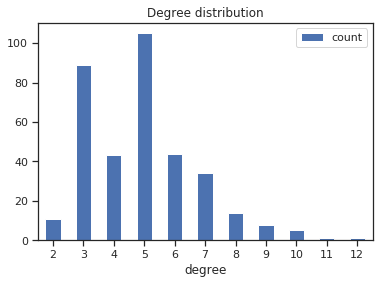

In [23]:
graph_tri.analyze(graph_tri.top)

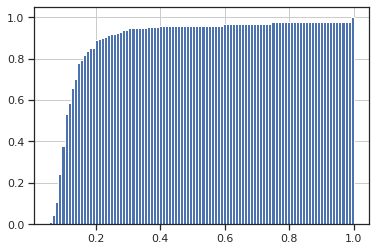

In [24]:
df_features["cc_bullet"].hist(cumulative=True, density=1, bins=100)

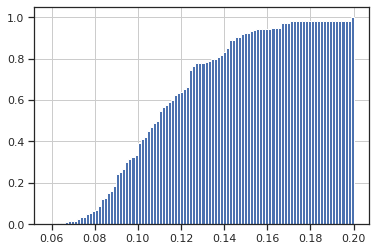

In [25]:
df_features_cm["cc_bullet"].hist(cumulative=True, density=1, bins=100)

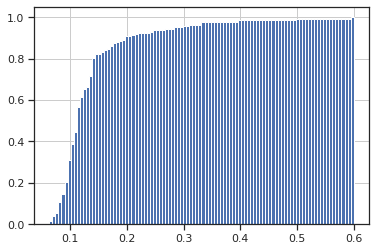

In [26]:
df_features_tri["cc_bullet"].hist(cumulative=True, density=1, bins=100)

In [42]:
list(itertools.combinations([2,3,4,5],2))

[(2, 3), (2, 4), (2, 5), (3, 4), (3, 5), (4, 5)]

# Comparaison of 1-mode features

# In progress

In [ ]:
# def compare_degree_dist(graph,strategy,setnames=["top","bottom"]):
    
#     # get graphs
#     graph_rd = BipartiteGraph.configuration_model(graph = graph)
#     graph_tri,_ = graph.tripartite_model(strategy=strategy)
    
#     def compare_by_set(setname):
        
#         # ----------
#         # variable
#         degrees_all = graph.get_all_degrees(graph.__dict__.get(setname))
#         distribution = Counter(degrees_all.values()) # return a dict (degree:count)

#         degrees_all_rd = graph_rd.get_all_degrees(graph_rd.__dict__.get(setname))
#         distribution_rd = Counter(degrees_all_rd.values()) # return a dict (degree:count)

#         degrees_all_tri = graph_tri.get_all_degrees(graph_tri.__dict__.get(setname))
#         distribution_tri = Counter(degrees_all_tri.values()) # return a dict (degree:count)

#         #-----------
#         #plotting
#         df_distribution = pd.DataFrame.from_dict(distribution, orient='index').reset_index()
#         df_distribution.rename(columns={'index':'degree',0:'count'}, inplace=True)
#         df_distribution.sort_values(by="degree",ascending=1, inplace=True) # sort the degree by ascending order

#         df_distribution_rd = pd.DataFrame.from_dict(distribution_rd, orient='index').reset_index()
#         df_distribution_rd.rename(columns={'index':'degree',0:'count_rd'}, inplace=True)
#         df_distribution_rd.sort_values(by="degree",ascending=1, inplace=True) # sort the degree by ascending order

#         df_distribution_tri = pd.DataFrame.from_dict(distribution_tri, orient='index').reset_index()
#         df_distribution_tri.rename(columns={'index':'degree',0:'count_tri'},inplace=True)
#         df_distribution_tri.sort_values(by="degree",ascending=1, inplace=True) # sort the degree by ascending order

        
#         ax = df_distribution.plot(color = "yellow",x="degree", y="count", title="Degree distribution "+setname, rot=0,logx=True, logy=True)
#         df_distribution_rd.plot(color = "green",ax=ax, x="degree", y="count_rd")
#         df_distribution_tri.plot(color = "red",ax=ax, x="degree", y="count_tri")

#     for setname in setnames:
#         compare_by_set(setname)


In [30]:
from collections import namedtuple

def get_degree_correlation(real_graph):
    
    def get_neighbor_avg_degree(dataset):
        degree_data = namedtuple('degree_data', ['degree','neighbor_avg_degree'])
        degrees_top = dataset.get_all_degrees(dataset.top)
        degrees_bottom = dataset.get_all_degrees(dataset.bottom)
        
        d_top = dict()
        for k,v in degrees_top.items():
            d_top[k] = degree_data(v, np.mean(list(map(lambda a: degrees_bottom.get(a),dataset.get_neighbors(k,dataset.top)))))

        d_bottom = dict()
        for k,v in degrees_bottom.items():
            d_bottom[k] = degree_data(v, np.mean(list(map(lambda a: degrees_top.get(a),dataset.get_neighbors(k,dataset.bottom)))))

        return d_top, d_bottom
    
    avg_d_top, avg_d_bottom = get_neighbor_avg_degree(real_graph)
    return avg_d_top, avg_d_bottom

In [55]:
graph_tri.top

AttributeError: 'tuple' object has no attribute 'top'

In [152]:
graph = hepB
top_real, bottom_real = get_degree_correlation(graph)

graph_rd = BipartiteGraph.configuration_model(graph = graph)
top_rd, bottom_rd = get_degree_correlation(graph_rd)

graph_tri,_ = graph.tripartite_model(strategy="maxnodes")
top_tri, bottom_tri = get_degree_correlation(graph_tri)

# graph_tri = BipartiteGraph.read_graph("arxiv_top","arxiv_bottom")
# top_tri, bottom_tri = get_degree_correlation(graph_tri)


121316 / 121363
11764 / 11766
15637 / 15639
81565 / 81572


In [154]:
BipartiteGraph.save_graph(graph_tri,"hepB_maxnodes")

In [ ]:
# 

In [157]:
graph.cc_bullet_graph()

0.5953889153190141

In [158]:
graph_rd.cc_bullet_graph()

0.3838611356839411

In [159]:
graph_tri.cc_bullet_graph()

0.42110644492844385

In [90]:
# For each node, we plot it 
def plotter(to_plot_list):
    def plotter_in(d):  
        degrees = [x.degree for x in  d.values()]
        avg_degree_neighbors = [x.neighbor_avg_degree for x in  d.values()]
        ax = plt.scatter(degrees, avg_degree_neighbors,s=20)

        axes = plt.gca()
#         axes.set_xlim([0,200])
        axes.set_yscale('log')
        axes.set_xscale('log')

    for elt in to_plot_list:
        plotter_in(elt)


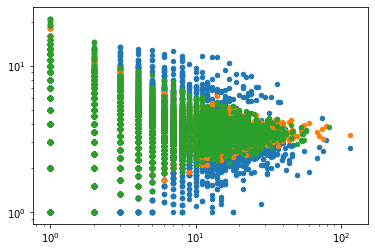

In [91]:
plotter([top_real, top_rd,top_tri])

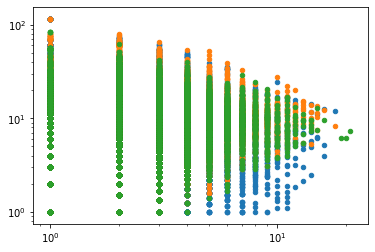

In [92]:
plotter([bottom_real, bottom_rd,bottom_tri])

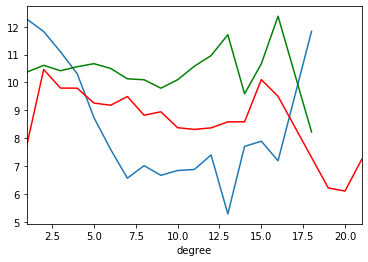

In [86]:
test =pd.DataFrame.from_dict(bottom_real, orient='index',
                       columns=["degree","neighbor_avg_degree"])

test2 = test.groupby(["degree"]).mean()


testa =pd.DataFrame.from_dict(bottom_rd, orient='index',
                       columns=["degree","neighbor_avg_degree"])

testa2 = testa.groupby(["degree"]).mean()


testb =pd.DataFrame.from_dict(bottom_tri, orient='index',
                       columns=["degree","neighbor_avg_degree"])

testb2 = testb.groupby(["degree"]).mean()



ax = test2["neighbor_avg_degree"].plot()
testa2["neighbor_avg_degree"].plot(ax = ax, color="green")
testb2["neighbor_avg_degree"].plot(ax = ax,color = "red")


In [49]:
dataset = linux_rd
degrees_top = dataset.get_all_degrees(dataset.top)
degrees_bottom = dataset.get_all_degrees(dataset.bottom)

NameError: name 'linux_rd' is not defined

In [50]:
d_top = dict()
for k,v in degrees_top.items():
    d_top[k] = (v, np.mean(list(map(lambda a: degrees_bottom.get(a),dataset.get_neighbors(k,dataset.top)))))
    
d_bottom = dict()
for k,v in degrees_bottom.items():
    d_bottom[k] = (v, np.mean(list(map(lambda a: degrees_top.get(a),dataset.get_neighbors(k,dataset.bottom)))))

NameError: name 'degrees_top' is not defined

(0, 100)

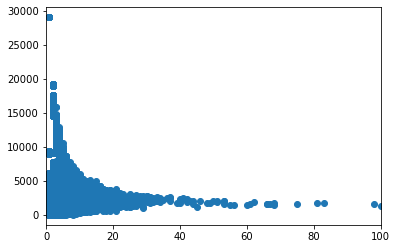

In [20]:
d = d_bottom
degrees = [x[0] for x in  d.values()]
avg_degree_neighbors = [x[1] for x in  d.values()]
ax = plt.scatter(degrees, avg_degree_neighbors)

axes = plt.gca()
axes.set_xlim([0,100])

In [105]:
z = {1:(20,10), 2:(30,10)}

In [50]:
z.values()

TypeError: 'dict_values' object is not subscriptable

# Old

In [66]:
top5 = {"A":{1,2},
        "B":{1,2,3,4},
        "C":{3,4},
        'F': set()}

bottom5 = {1:{"A","B"},
           2:{"A","B"},
           3:{"B","C"},
           4:{"B","C"}}

bg5 = BipartiteGraph(top5,bottom5)


In [67]:
{1,3} & {4,1,2}

{1}

In [75]:
top = {"A":{2,3,4,5},
       "B":{1,2,3},
       "C":{3,4,5,6}}

bottom = BipartiteGraph.get_bottom(top)
print(bottom)
bg = BipartiteGraph(top,bottom)

defaultdict(<class 'set'>, {2: {'A', 'B'}, 3: {'C', 'A', 'B'}, 4: {'C', 'A'}, 5: {'C', 'A'}, 1: {'B'}, 6: {'C'}})


In [77]:
count = 0

for e1,e2 in itertools.combinations(bg.top.get("A"),2):
    print(e1,e2)
    e1_neighbors = bg.bottom.get(e1)
    e2_neighbors = bg.bottom.get(e2)
    inter = e1_neighbors & e2_neighbors
    inter.remove("A")
    if len(inter):
        count+=1
        
count

2 3
2 4
2 5
3 4
3 5
4 5


4

In [79]:
for (e1,e2) in itertools.combinations(bg.top.get("A"),2):
    print(e1,e2)

2 3
2 4
2 5
3 4
3 5
4 5


In [74]:
#redundancy A 
pairs = list(itertools.combinations(bg.top.get("A"),2))
print(pairs)
for e1,e2 in pairs:
    print(e1,e2)
    e1_neighbors = bg.bottom.get(e1)
    e2_neighbors = bg.bottom.get(e2)
    print("NEIGH",e1_neighbors,e2_neighbors)
    inter = e1_neighbors & e2_neighbors
    print("BEFORE",inter)
    inter.remove("A")
    print("HERE",inter)

[(2, 3), (2, 4), (2, 5), (2, 7), (3, 4), (3, 5), (3, 7), (4, 5), (4, 7), (5, 7)]
2 3
NEIGH {'A', 'B'} {'C', 'A', 'B'}
BEFORE {'A', 'B'}
HERE {'B'}
2 4
NEIGH {'A', 'B'} {'C', 'A'}
BEFORE {'A'}
HERE set()
2 5
NEIGH {'A', 'B'} {'C', 'A'}
BEFORE {'A'}
HERE set()
2 7
NEIGH {'A', 'B'} {'A'}
BEFORE {'A'}
HERE set()
3 4
NEIGH {'C', 'A', 'B'} {'C', 'A'}
BEFORE {'C', 'A'}
HERE {'C'}
3 5
NEIGH {'C', 'A', 'B'} {'C', 'A'}
BEFORE {'C', 'A'}
HERE {'C'}
3 7
NEIGH {'C', 'A', 'B'} {'A'}
BEFORE {'A'}
HERE set()
4 5
NEIGH {'C', 'A'} {'C', 'A'}
BEFORE {'C', 'A'}
HERE {'C'}
4 7
NEIGH {'C', 'A'} {'A'}
BEFORE {'A'}
HERE set()
5 7
NEIGH {'C', 'A'} {'A'}
BEFORE {'A'}
HERE set()


In [53]:
a = {1,2,3}

In [70]:
a.remove(4)

KeyError: 4

In [100]:
bpse.top.keys()

dict_keys([0, 1, 10, 1000, 1001, 100, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010, 1011, 101, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 102, 1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 103, 1032, 1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 104, 1042, 1043, 1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051, 105, 1052, 1053, 1054, 1055, 1056, 1057, 1058, 1059, 1060, 1061, 106, 1062, 1063, 1064, 1065, 1066, 1067, 1068, 1069, 1070, 1071, 107, 1072, 1073, 1074, 1075, 1076, 1077, 1078, 1079, 1080, 1081, 108, 1082, 1083, 1084, 1085, 1086, 1087, 1088, 1089, 1090, 1091, 109, 1092, 1093, 1094, 1095, 1096, 1097, 1098, 1099, 11, 1100, 1101, 110, 1102, 1103, 1104, 1105, 1106, 1107, 1108, 1109, 1110, 1111, 111, 1112, 1113, 1114, 1115, 1116, 1117, 1118, 1119, 1120, 112, 1121, 1122, 1123, 1124, 1125, 1126, 1127, 1128, 1129, 1130, 113, 1131, 1132, 1133, 1134, 1135, 1136, 1137, 1138, 1139, 1140, 1141, 114, 1142, 1143, 1144, 1145, 1146, 1147, 1148, 1149, 

In [ ]:
bpse.all

In [113]:
# bg.get_redundancyA("A",bg.top)
bpse.get_redundancyA(1000,bpse.top)

3.170967102050781e-05


(1.0, 6, 6)

In [114]:
# bg.get_redundancyB("A",bg.top)
bpse.get_redundancyB(1000,bpse.top)

2.5272369384765625e-05


(1.0, 6, 6)

In [108]:
get_local_feature(bg.get_redundancy, bg.top)


AttributeError: 'BipartiteGraph' object has no attribute 'get_redundancy'

In [119]:
data = all_local_features(bpse,bpse.top)

LEN A 1447
LEN SET 1447
1.8596649169921875e-05
9.059906005859375e-06
1.1682510375976562e-05
9.298324584960938e-06
4.0531158447265625e-06
8.58306884765625e-06
3.814697265625e-06
3.814697265625e-06
3.5762786865234375e-06
3.337860107421875e-06
7.152557373046875e-06
6.198883056640625e-06
5.7220458984375e-06
5.9604644775390625e-06
5.245208740234375e-06
5.0067901611328125e-06
6.4373016357421875e-06
5.4836273193359375e-06
5.0067901611328125e-06
7.62939453125e-06
1.8835067749023438e-05
1.0728836059570312e-05
8.58306884765625e-06
4.0531158447265625e-06
4.0531158447265625e-06
1.5020370483398438e-05
1.430511474609375e-05
7.3909759521484375e-06
1.4066696166992188e-05
1.3589859008789062e-05
4.291534423828125e-06
4.291534423828125e-06
3.814697265625e-06
4.0531158447265625e-06
5.245208740234375e-06
4.76837158203125e-06
4.291534423828125e-06
4.291534423828125e-06
6.9141387939453125e-06
4.291534423828125e-06
4.5299530029296875e-06
4.5299530029296875e-06
4.0531158447265625e-06
4.5299530029296875e-06
1.1

ZeroDivisionError: division by zero